In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Set random seed based on unique identifier (example seed, replace with your N-number)
random.seed(10374707)  

# Load the dataset
data = pd.read_csv('musicData.csv')

# Display the first few rows of the dataset
data.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [2]:
print(data.columns)
print(data.dtypes)

# Verify that NaN values have been imputed
print(data.isnull().sum())

# Drop rows with any NaN values
data.dropna(inplace=True)

# Verify that NaN values have been dropped
print(data.isnull().sum())

Index(['instance_id', 'artist_name', 'track_name', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'obtained_date', 'valence', 'music_genre'],
      dtype='object')
instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object
instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalne

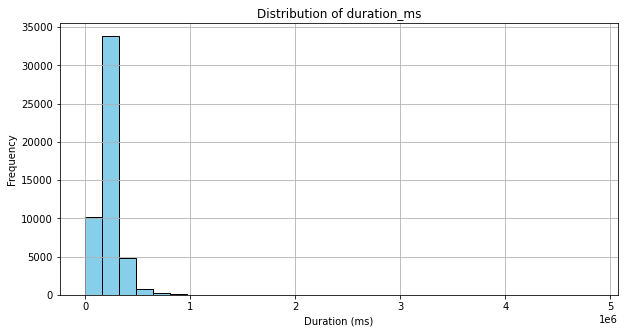

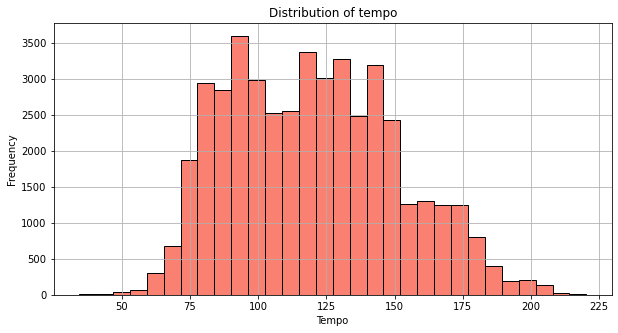

In [3]:


# making ? in temp and -ve values in duration nans and then imputing them with their column modes
# converting all columns into numeric 
for column in ['popularity','tempo','acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Plot the distribution of 'duration_ms'
plt.figure(figsize=(10, 5))
plt.hist(data['duration_ms'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of duration_ms')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot the distribution of 'tempo'
plt.figure(figsize=(10, 5))
plt.hist(data['tempo'].astype(float), bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [4]:
# Impute NaN values with column modes for temp because all values with ? were turned in to nan and now they are imputed
data['tempo'].fillna(data['tempo'].mode()[0], inplace=True)

# Replace negative values with NaN
data['duration_ms'] = data['duration_ms'].apply(lambda x: np.nan if x < 0 else x)

# Calculate mode excluding NaN values
duration_mode = data['duration_ms'].mode()[0]

# Replace NaN values with the mode
data['duration_ms'].fillna(duration_mode, inplace=True)

# Verify that negative values have been replaced
print("Number of negative values in 'duration_ms' column after imputation:", (data['duration_ms'] < 0).sum())


# Verify that NaN values have been imputed
print(data.isnull().sum())

# Loop through each column and print value counts
for column in data.columns:
    print(f"Value counts for '{column}' column:")
    print(data[column].value_counts())
    print()


Number of negative values in 'duration_ms' column after imputation: 0
instance_id         0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
obtained_date       0
valence             0
music_genre         0
dtype: int64
Value counts for 'instance_id' column:
32894.0    1
86846.0    1
21212.0    1
61915.0    1
74702.0    1
          ..
87102.0    1
62768.0    1
31933.0    1
52683.0    1
63470.0    1
Name: instance_id, Length: 50000, dtype: int64

Value counts for 'artist_name' column:
empty_field                2489
Nobuo Uematsu               429
Wolfgang Amadeus Mozart     402
Ludwig van Beethoven        317
Johann Sebastian Bach       314
                           ... 
Ward Davis                    1
A.A. Bondy                  

In [5]:
# Encode categorical data

# Applying one-hot encoding to 'key' and 'mode' columns
data = pd.get_dummies(data, columns=['key', 'mode'])

data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,240000.0,0.941,0.79200,0.115,...,0,0,0,0,0,0,0,0,0,1
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,...,0,1,0,0,0,0,0,0,0,1
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,...,0,0,0,0,0,0,0,1,1,0
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,...,1,0,0,0,0,0,0,0,1,0
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,...,0,0,0,0,0,1,0,0,1,0


In [6]:
print(data["music_genre"].value_counts())

Electronic     5000
Anime          5000
Jazz           5000
Alternative    5000
Country        5000
Rap            5000
Blues          5000
Rock           5000
Classical      5000
Hip-Hop        5000
Name: music_genre, dtype: int64


In [7]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,240000.0,0.941,0.79200,0.115,...,0,0,0,0,0,0,0,0,0,1
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,0.124,...,0,1,0,0,0,0,0,0,0,1
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,0.534,...,0,0,0,0,0,0,0,1,1,0
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,0.157,...,1,0,0,0,0,0,0,0,1,0
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,0.157,...,0,0,0,0,0,1,0,0,1,0


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "music_genre" column to encode categorical labels to numerical labels
data['music_genre'] = label_encoder.fit_transform(data['music_genre'])

# Print the mapping between original labels and encoded labels
print("Mapping between original labels and encoded labels:")
for i, genre in enumerate(label_encoder.classes_):
    print(f"{genre}: {i}")

# Display the encoded column
print("\nEncoded 'music_genre' column:")
print(data['music_genre'])


# Separate features and target variable
X = data.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date', 'music_genre'])
y = data['music_genre']



# Select the features to normalize
features_to_normalize = ['popularity', 'acousticness', 'danceability', 
                         'duration_ms', 'energy', 'instrumentalness', 
                         'liveness', 'loudness', 'speechiness', 'tempo']

# Extract the selected features from the DataFrame
X_selected = data[features_to_normalize]

# Normalizing the selected features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Replace the original selected features with the normalized values
data[features_to_normalize] = X_scaled



from sklearn.model_selection import train_test_split

# Split the data into train and test sets (80% train, 20% test)
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame containing the cleaned data

# Group data by genre
grouped_data = data.groupby('music_genre')

# Initialize lists to store train and test data
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# For each genre
for genre, group in grouped_data:
    # Shuffle the data within each genre
    group = group.sample(frac=1, random_state=42)
    
    # Select 500 songs for the test set and 4500 for the train set
    test_data = group[:500]
    train_data = group[500:5000]

    # Append to the train and test lists
    X_train_list.append(train_data.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date', 'music_genre']))
    X_test_list.append(test_data.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date', 'music_genre']))
    y_train_list.append(train_data['music_genre'])
    y_test_list.append(test_data['music_genre'])

# Concatenate the train and test data for each genre
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
y_train = pd.concat(y_train_list)
y_test = pd.concat(y_test_list)

# Now X_train, X_test, y_train, and y_test contain the train-test split as per the specified requirements


# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)





Mapping between original labels and encoded labels:
Alternative: 0
Anime: 1
Blues: 2
Classical: 3
Country: 4
Electronic: 5
Hip-Hop: 6
Jazz: 7
Rap: 8
Rock: 9

Encoded 'music_genre' column:
0        5
1        5
2        5
3        5
4        5
        ..
50000    6
50001    6
50002    6
50003    6
50004    6
Name: music_genre, Length: 50000, dtype: int64
Train set shape: (45000, 25) (45000,)
Test set shape: (5000, 25) (5000,)


In [9]:
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Major,mode_Minor
0,32894.0,Röyksopp,Röyksopp's Night Out,-1.108003,-0.883886,0.524878,-0.046881,1.289876,1.875809,-0.488113,...,0,0,0,0,0,0,0,0,0,1
1,46652.0,Thievery Corporation,The Shining Path,-0.850633,-0.860390,0.356933,-0.252055,1.097101,2.361357,-0.432433,...,0,1,0,0,0,0,0,0,0,1
2,30097.0,Dillon Francis,Hurricane,-1.043661,-0.888632,0.345737,-0.277386,0.586813,-0.521812,2.104140,...,0,0,0,0,0,0,0,1,1,0
3,62177.0,Dubloadz,Nitro,-0.657606,-0.823184,1.207853,-0.738056,0.378918,-0.550300,-0.228269,...,1,0,0,0,0,0,0,0,1,0
4,24907.0,What So Not,Divide & Conquer,-0.786291,-0.883974,0.446504,-0.213528,-0.048212,2.235361,-0.228269,...,0,0,0,0,0,1,0,0,1,0


/Users/mananbajaj/opt/anaconda3/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


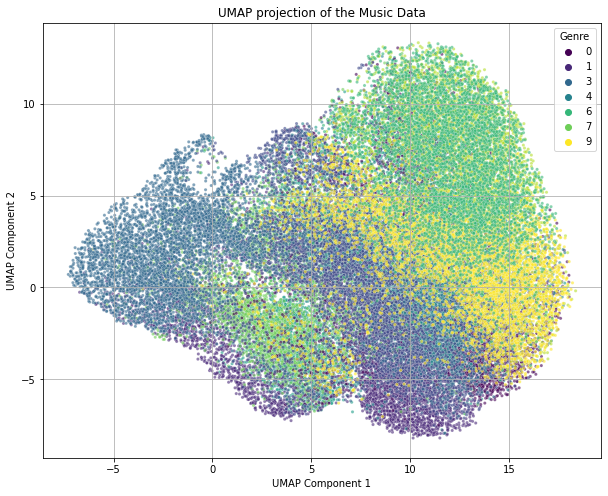

In [10]:
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming 'data' has been loaded and cleaned
features = ['popularity', 'acousticness', 'danceability', 'duration_ms', 
            'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']


X_scaled = data[features]

# Initialize UMAP with the chosen hyperparameters
reducer = umap.UMAP(
    n_neighbors=40,   # A moderate value to start exploring the dataset
    min_dist=1,     # Allows some overlap but maintains distinction in clusters
    n_components=2,
    metric='euclidean',
    random_state=42   # For reproducibility
)

# Fit and transform the scaled data
embedding = reducer.fit_transform(X_scaled)

# Plot the result
plt.figure(figsize=(10, 8))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=data['music_genre'], palette='viridis', s=10, alpha=0.6)
plt.title('UMAP projection of the Music Data')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Genre', loc='best')
plt.grid(True)
plt.show()



Number of components with eigenvalues greater than 1 (using Kaiser criterion): 3


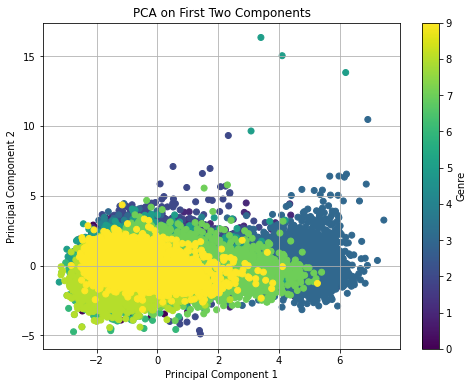

In [11]:
import matplotlib.pyplot as plt

# Fit PCA with all components to get eigenvalues
pca_all = PCA()
pca_all.fit(X_train)

# Get eigenvalues
eigenvalues = pca_all.explained_variance_

# Get number of components using Kaiser criterion
num_components_kaiser = np.sum(eigenvalues > 1)

# Print the number of components with eigenvalues greater than 1
print("Number of components with eigenvalues greater than 1 (using Kaiser criterion):", num_components_kaiser)

# Reinitialize PCA with the selected number of components
pca = PCA(n_components=num_components_kaiser,random_state=42)

# Fit PCA on the training data with the selected number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Plot PCA on the first two components
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title('PCA on First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Genre')
plt.grid(True)
plt.show()


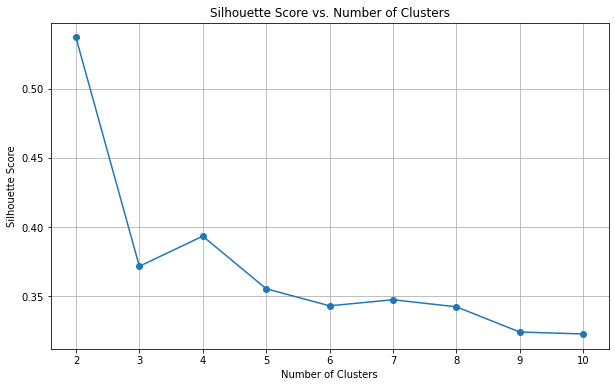

In [15]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize PCA with all components to get eigenvalues
pca_all = PCA()
pca_all.fit(X_train)

# Get eigenvalues
eigenvalues = pca_all.explained_variance_


# Reinitialize PCA with the selected number of components
pca = PCA(n_components=2)

# Fit PCA on the training data with the selected number of components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize lists to store silhouette scores
silhouette_scores = []

# Iterate over a range of possible numbers of clusters
for n_clusters in range(2, 11):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(X_train_pca[:, :2])
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(X_train_pca[:, :2], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.grid(True)
plt.show()





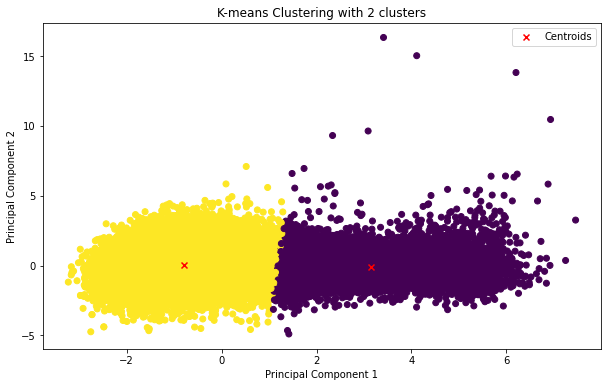

In [16]:
# Use K-means clustering with optimal number of clusters
optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=optimal_n_clusters)
kmeans.fit(X_train_pca[:, :2])

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-means Clustering with {optimal_n_clusters} clusters')
plt.legend()
plt.show()



Results using PCA-transformed data:
Random Forest:
  Accuracy: 0.2704
  AUC: 0.7500

AdaBoost:
  Accuracy: 0.3138
  AUC: 0.6788

XGBoost:
  Accuracy: 0.3230
  AUC: 0.8021

Results using non-PCA train data:
Random Forest:
  Accuracy: 0.5502
  AUC: 0.9119

AdaBoost:
  Accuracy: 0.4854
  AUC: 0.8704

XGBoost:
  Accuracy: 0.5766
  AUC: 0.9307



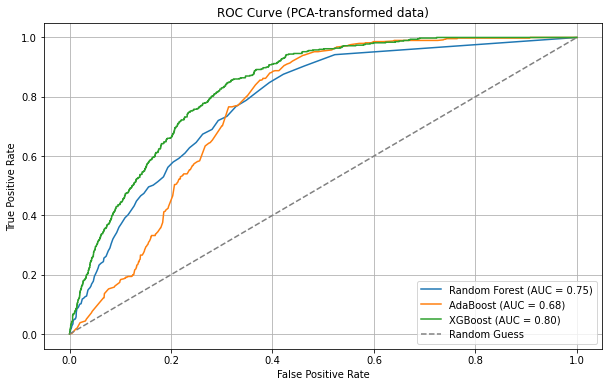

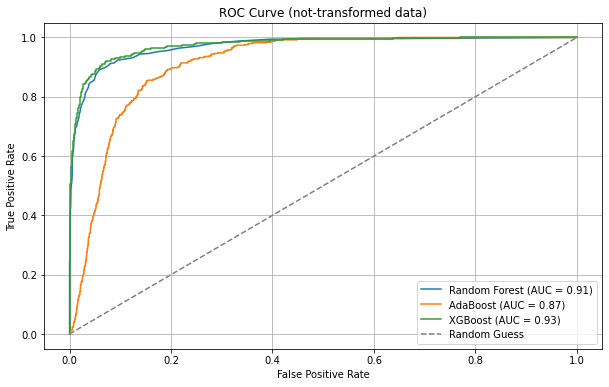

In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier()
}

# Initialize lists to store results
results_pca = {}
results_non_pca = {}

# Iterate over classifiers
for name, clf in classifiers.items():
    # Fit and evaluate the model using PCA-transformed data
    clf.fit(X_train_pca, y_train)
    y_pred_pca = clf.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    auc_pca = roc_auc_score(y_test, clf.predict_proba(X_test_pca), multi_class='ovr')
    fpr_pca, tpr_pca, _ = roc_curve(y_test, clf.predict_proba(X_test_pca)[:,1], pos_label=clf.classes_[1])
    
    results_pca[name] = {
        "Accuracy": accuracy_pca,
        "AUC": auc_pca,
        "FPR": fpr_pca,
        "TPR": tpr_pca
    }
    
    # Fit and evaluate the model using non-PCA train data
    clf.fit(X_train, y_train)
    y_pred_non_pca = clf.predict(X_test)
    accuracy_non_pca = accuracy_score(y_test, y_pred_non_pca)
    auc_non_pca = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
    fpr_non_pca, tpr_non_pca, _ = roc_curve(y_test, clf.predict_proba(X_test)[:,1], pos_label=clf.classes_[1])
    
    results_non_pca[name] = {
        "Accuracy": accuracy_non_pca,
        "AUC": auc_non_pca,
        "FPR": fpr_non_pca,
        "TPR": tpr_non_pca
    }

# Display results
print("Results using PCA-transformed data:")
for name, metrics in results_pca.items():
    print(f"{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  AUC: {metrics['AUC']:.4f}")
    print()

print("Results using non-PCA train data:")
for name, metrics in results_non_pca.items():
    print(f"{name}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  AUC: {metrics['AUC']:.4f}")
    print()

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, metrics in results_pca.items():
    plt.plot(metrics['FPR'], metrics['TPR'], label=f"{name} (AUC = {metrics['AUC']:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (PCA-transformed data)')
plt.legend()
plt.grid(True)
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, metrics in results_non_pca.items():
    plt.plot(metrics['FPR'], metrics['TPR'], label=f"{name} (AUC = {metrics['AUC']:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (not-transformed data)')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/50, Train Loss: 1.6535, Test Loss: 1.3434, Accuracy: 0.4788, AUC: 0.8947
Epoch 2/50, Train Loss: 1.4724, Test Loss: 1.2907, Accuracy: 0.5034, AUC: 0.9025
Epoch 3/50, Train Loss: 1.4333, Test Loss: 1.2617, Accuracy: 0.5278, AUC: 0.9065
Epoch 4/50, Train Loss: 1.4162, Test Loss: 1.2485, Accuracy: 0.5232, AUC: 0.9074
Epoch 5/50, Train Loss: 1.3980, Test Loss: 1.2316, Accuracy: 0.5380, AUC: 0.9099
Epoch 6/50, Train Loss: 1.3876, Test Loss: 1.2225, Accuracy: 0.5440, AUC: 0.9107
Epoch 7/50, Train Loss: 1.3783, Test Loss: 1.2119, Accuracy: 0.5394, AUC: 0.9130
Epoch 8/50, Train Loss: 1.3712, Test Loss: 1.2055, Accuracy: 0.5470, AUC: 0.9138
Epoch 9/50, Train Loss: 1.3616, Test Loss: 1.1917, Accuracy: 0.5550, AUC: 0.9158
Epoch 10/50, Train Loss: 1.3627, Test Loss: 1.1955, Accuracy: 0.5490, AUC: 0.9155
Epoch 11/50, Train Loss: 1.3535, Test Loss: 1.1839, Accuracy: 0.5610, AUC: 0.9153
Epoch 12/50, Train Loss: 1.3487, Test Loss: 1.1868, Accuracy: 0.5502, AUC: 0.9157
Epoch 13/50, Train Loss: 

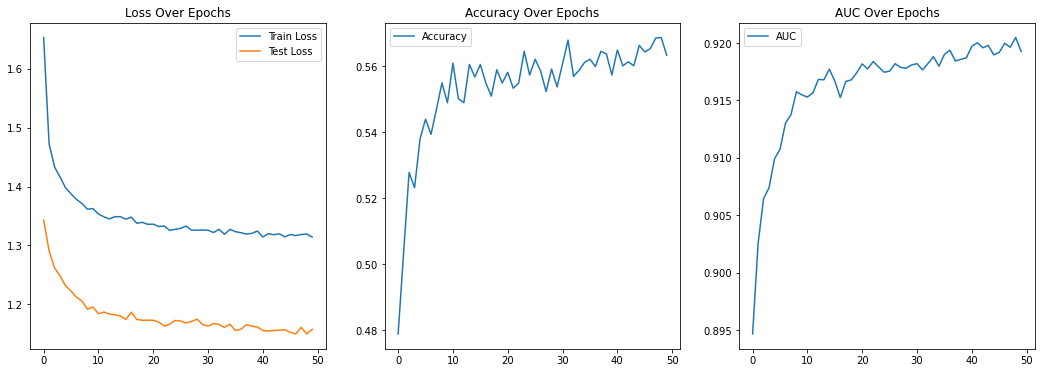

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Ensure that X_train, X_test are Pandas DataFrame and y_train, y_test are Pandas Series or NumPy arrays
# Convert the DataFrame and Series to NumPy arrays first
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# Convert arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_train_np).float()
X_test_tensor = torch.tensor(X_test_np).float()
y_train_tensor = torch.tensor(y_train_np).long()  # Ensure y_train is an array of integers
y_test_tensor = torch.tensor(y_test_np).long()

# Assuming X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor are already defined and correct
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class MusicGenreClassifier(nn.Module):
    def __init__(self):
        super(MusicGenreClassifier, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(X_train.shape[1], 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(32, 10)  # Assuming 10 genres
        )

    def forward(self, x):
        return self.network(x)

model = MusicGenreClassifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train_model(model, train_loader, test_loader, criterion, optimizer, epochs=50):
    train_losses, test_losses, accuracies, auc_scores = [], [], [], []
    for epoch in range(epochs):
        model.train()
        running_loss = 0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        model.eval()
        test_loss, correct, total = 0, 0, 0
        all_targets, all_outputs = [], []
        with torch.no_grad():
            for inputs, targets in test_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                test_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += targets.size(0)
                correct += (predicted == targets).sum().item()
                all_targets.extend(targets.numpy())
                all_outputs.extend(torch.nn.functional.softmax(outputs, dim=1).numpy())

        # Compute AUC
        all_targets = np.array(all_targets)
        all_outputs = np.array(all_outputs)
        if len(np.unique(all_targets)) > 1:  # AUC is only defined when there is more than one class
            auc_score = roc_auc_score(np.eye(10)[all_targets], all_outputs, multi_class='ovr')
            auc_scores.append(auc_score)

        train_loss = running_loss / len(train_loader)
        test_loss /= len(test_loader)
        accuracy = correct / total
        train_losses.append(train_loss)
        test_losses.append(test_loss)
        accuracies.append(accuracy)

        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}, AUC: {auc_score:.4f}')

    return train_losses, test_losses, accuracies, auc_scores

train_losses, test_losses, accuracies, auc_scores = train_model(model, train_loader, test_loader, criterion, optimizer)

# Plotting training results
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Over Epochs')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(accuracies, label='Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(auc_scores, label='AUC')
plt.title('AUC Over Epochs')
plt.legend()

plt.show()




In [20]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'n_estimators': [50, 100, 200, 300],
    # Add more hyperparameters as needed
}

# Initialize the XGBoost classifier
xgb = XGBClassifier()

# Perform RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=50, 
                                   scoring='accuracy', cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
auc_test = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr')

print("Test Set Metrics:")
print("Accuracy:", accuracy_test)
print("AUC:", auc_test)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.2}
Test Set Metrics:
Accuracy: 0.5916
AUC: 0.93362


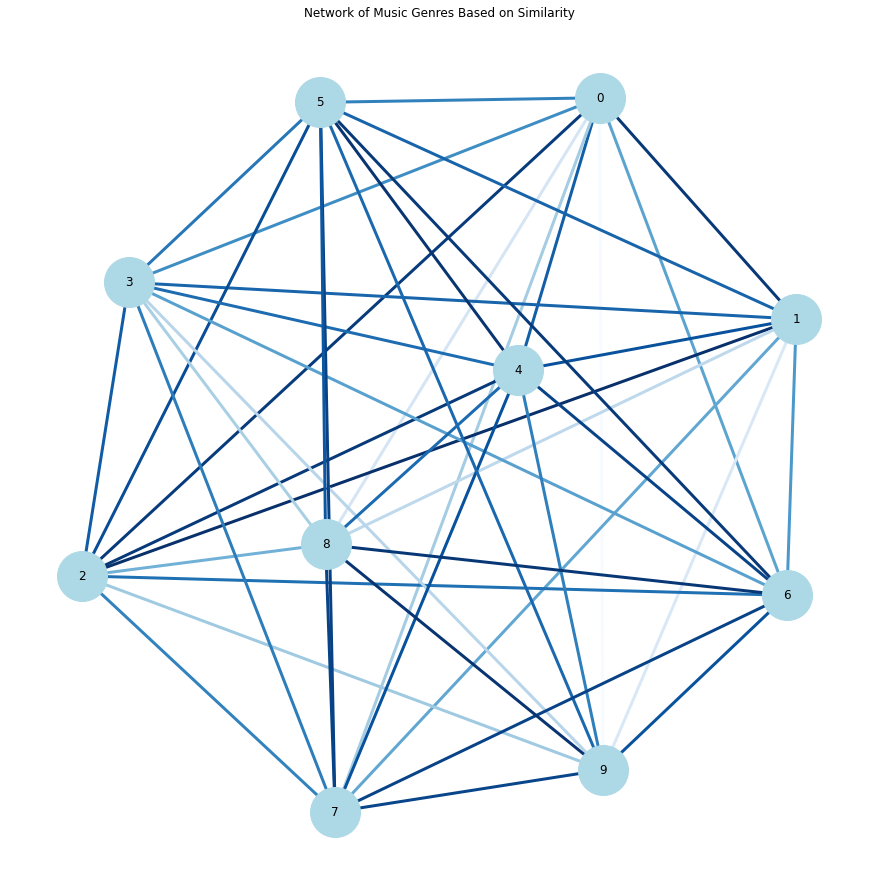

In [25]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Assuming 'data' contains all the features and genre labels
# Calculate the average features for each genre
genre_means = data.groupby('music_genre').mean()

# Calculate cosine similarity matrix among genres
similarity_matrix = cosine_similarity(genre_means)

# Create a DataFrame for the similarity matrix with genre labels
similarity_df = pd.DataFrame(similarity_matrix, index=genre_means.index, columns=genre_means.index)

# Build the graph
G = nx.Graph()
for genre in genre_means.index:
    G.add_node(genre)

# Add edges between every pair of genres with similarity above a threshold
threshold = 0.5  # Set a threshold to avoid too dense a graph
for i, genre1 in enumerate(genre_means.index):
    for j, genre2 in enumerate(genre_means.index):
        if i < j and similarity_df.iloc[i, j] > threshold:
            G.add_edge(genre1, genre2, weight=similarity_df.iloc[i, j])

# Draw the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # for consistent layout
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())
nx.draw(G, pos, node_color='lightblue', node_size=2500, edgelist=edges, edge_color=weights, width=3.0, edge_cmap=plt.cm.Blues, with_labels=True)
plt.title('Network of Music Genres Based on Similarity')
plt.show()






Alternative: 0
Anime: 1
Blues: 2
Classical: 3
Country: 4
Electronic: 5
Hip-Hop: 6
Jazz: 7
Rap: 8
Rock: 9

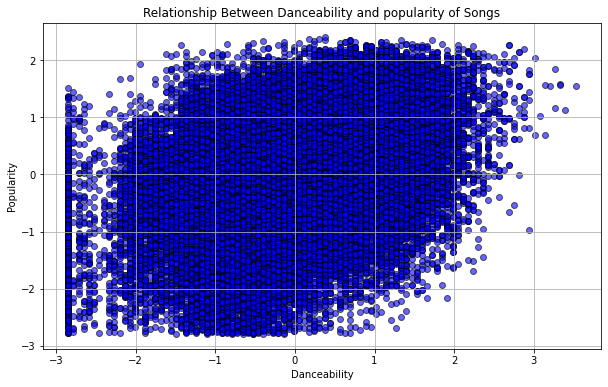

In [29]:
import matplotlib.pyplot as plt

# Assuming 'data' DataFrame is already loaded and contains 'danceability' and 'speechiness' columns

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['popularity'], data['danceability'], alpha=0.6, color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Relationship Between Danceability and popularity of Songs')
plt.xlabel('Danceability')
plt.ylabel('Popularity')

# Show the plot
plt.grid(True)
plt.show()
